In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sum
import seaborn as sns

import chart_studio.plotly as py

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df


### Seasonal Autoregressive Integrated Moving Average

with SARIMA we use an additional set of parameters that describe seasonal computers of our model(P,D,Q)m.

* P : Seasonal Regression
* D : Differencing
* Q : Moving Average
* M : Rows in Each seson Cycle

With monthly data with a yearly seasonal cycle m would equal 12.

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4696\2145197750.py:4: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: xlabel='date'>

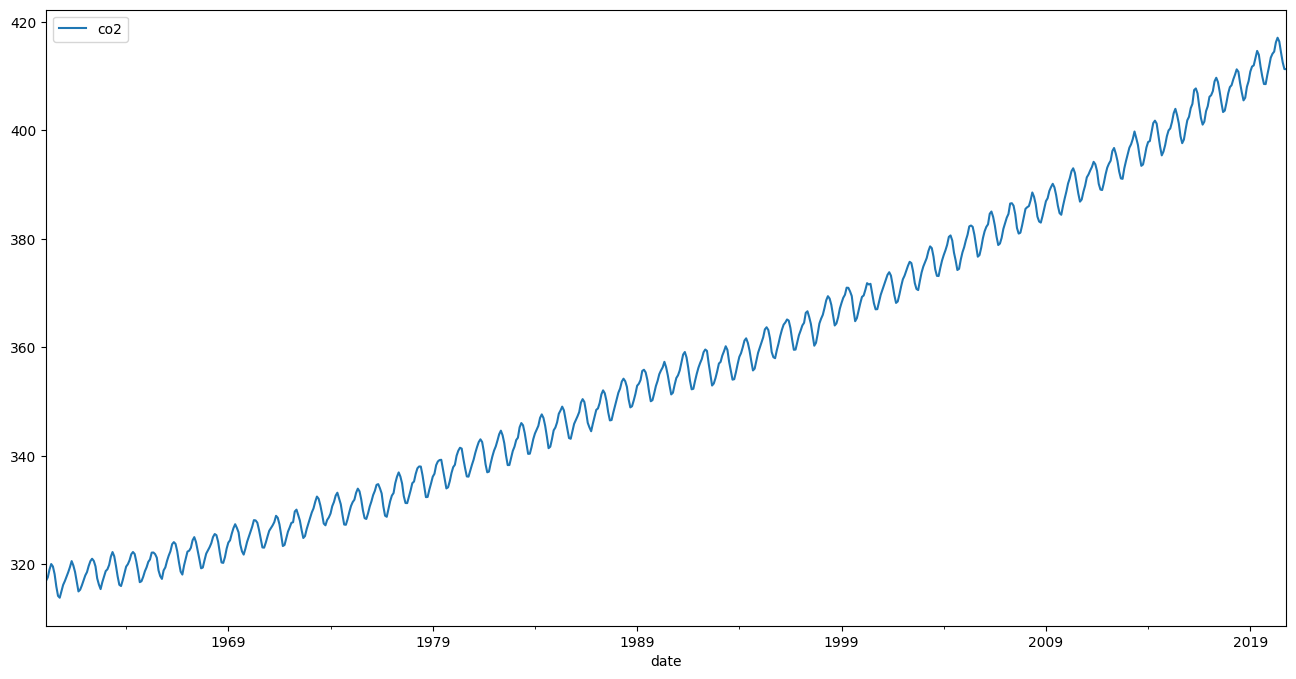

In [4]:
co2_df = pd.read_csv('../datasets/co2_data.csv', index_col='date', parse_dates=True)
co2_df = co2_df[co2_df.index>'1960-01-01']
co2_df = co2_df.asfreq('MS')
co2_df =co2_df.fillna(method='ffill')
co2_df.plot(figsize=(16,8))


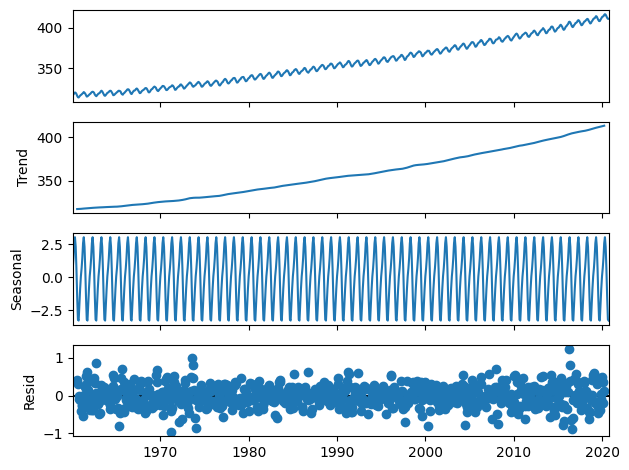

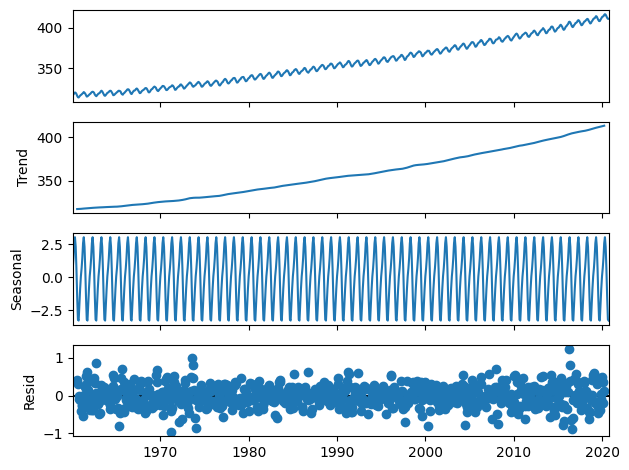

In [5]:
res = seasonal_decompose(co2_df, model='add')
res.plot()

In [8]:
auto_arima(co2_df, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=461.430, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2378.581, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1613.443, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2384.532, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1102.221, Time=2.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=757.051, Time=3.99 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=432.415, Time=7.35 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=587.696, Time=6.82 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=15.14 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=489.375, Time=7.10 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=431.367, Time=5.72 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=423.830, Time=2.26 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1495.893, Time=0.84 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -195.814
Date:                              Sun, 28 Apr 2024   AIC                            403.628
Time:                                      08:14:12   BIC                            431.170
Sample:                                  02-01-1960   HQIC                           414.255
                                       - 10-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3520      0.036     -9.830      0.000      -0.422      -0.282
ma.L2         -0.0354      0.034     -1.035      0.301      -0.103       0.032
ma.L3         -0.0624      0.026     -2.439      0.015      -0.113      -0.012
ar.S.L12       0.9997      0.000   3450.272      0.000       0.999       1.000
ma.S.L12      -0.8640      0.021    -40.238      0.000      -0.906      -0.822
sigma2         0.0928      0.005     20.378      0.000       0.084       0.102
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.83
Prob(Q):                              0.80   Prob(JB):                         0.15
Heteroskedasticity (H):               1.19   Skew:                            -0.02
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

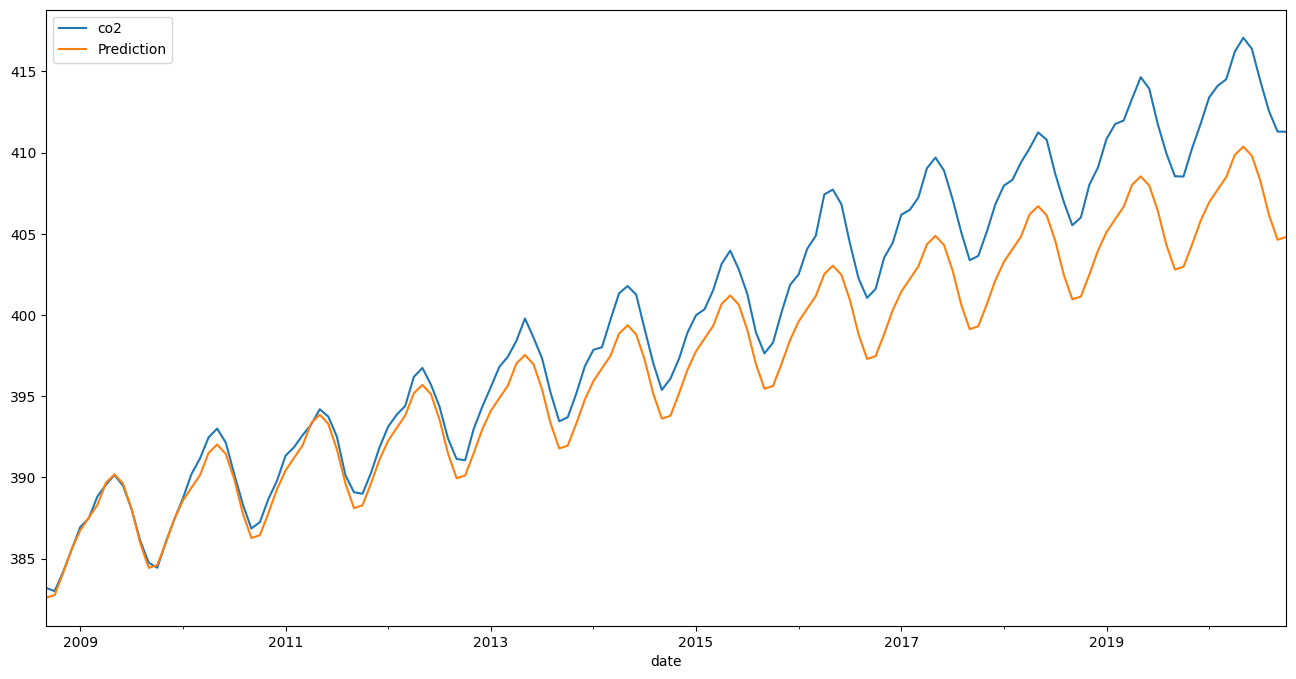

In [7]:
import warnings
warnings.filterwarnings('ignore')

len(co2_df)
train_df = co2_df.iloc[:583]
test_df = co2_df.iloc[583:]

model = SARIMAX(train_df, order=(0,1,3), seasonal_order=(1,0,1,12))

res = model.fit()
start = len(train_df)
end =len(train_df) + len(test_df) -1
prediction = res.predict(start, end, type='linear').rename('Prediction')

test_df.plot(legend=True, figsize=(16, 8))
prediction.plot(legend=True)

#### Test Prediction

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

co2_df.mean()
np.sqrt(mean_squared_error(test_df, prediction))

3.4039741872654194

#### Predict the Future

<Axes: xlabel='date'>

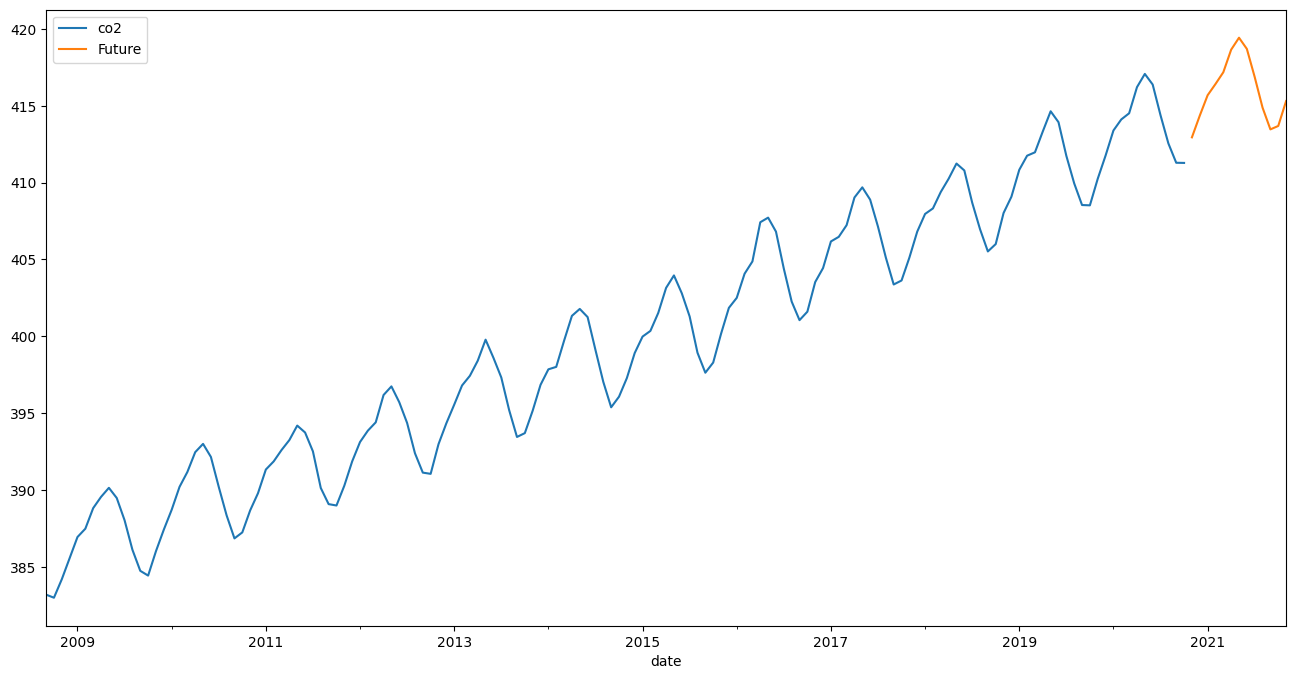

In [10]:
model = SARIMAX(co2_df, order=(0,1,3), seasonal_order=(1,0,1,12))

res = model.fit()
future = res.predict(len(co2_df), len(co2_df)+ 12, typ='levels').rename('Future')

test_df.plot(legend=True, figsize=(16,8))
future.plot(legend=True)